In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Users\Svitlana\Desktop\Projekt_2025\Muster_-S\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "geethasagarbonthu/marketing-and-e-commerce-analytics-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\marketing-and-e-commerce-analytics-dataset' already exists with files. Skipping download (replace=False).


In [3]:
files

['campaigns.csv',
 'customers.csv',
 'events.csv',
 'products.csv',
 'transactions.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100
3,4,Display,Reactivation,2022-07-25,2022-10-07,Deal Seekers,0.111
4,5,Social,Acquisition,2022-07-09,2022-09-29,New Customers,0.144


In [5]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(50, 7)

'Description'

,count,mean,std,min,25%,50%,75%,max
campaign_id,50.0,25.50,14.58,1.00,13.25,25.50,37.75,50.00
expected_uplift,50.0,0.09,0.04,0.02,0.06,0.09,0.11,0.14


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
campaign_id,int64,0,50,"[41, 29, 18]"
channel,object,0,5,"[Paid Search, Display, Display]"
objective,object,0,4,"[Cross-sell, Retention, Retention]"
start_date,object,0,49,"[2022-04-01, 2023-04-05, 2023-07-02]"
end_date,object,0,48,"[2022-01-31, 2021-10-16, 2022-04-11]"
target_segment,object,0,5,"[Deal Seekers, New Customers, All]"
expected_uplift,float64,0,43,"[0.037, 0.117, 0.032]"


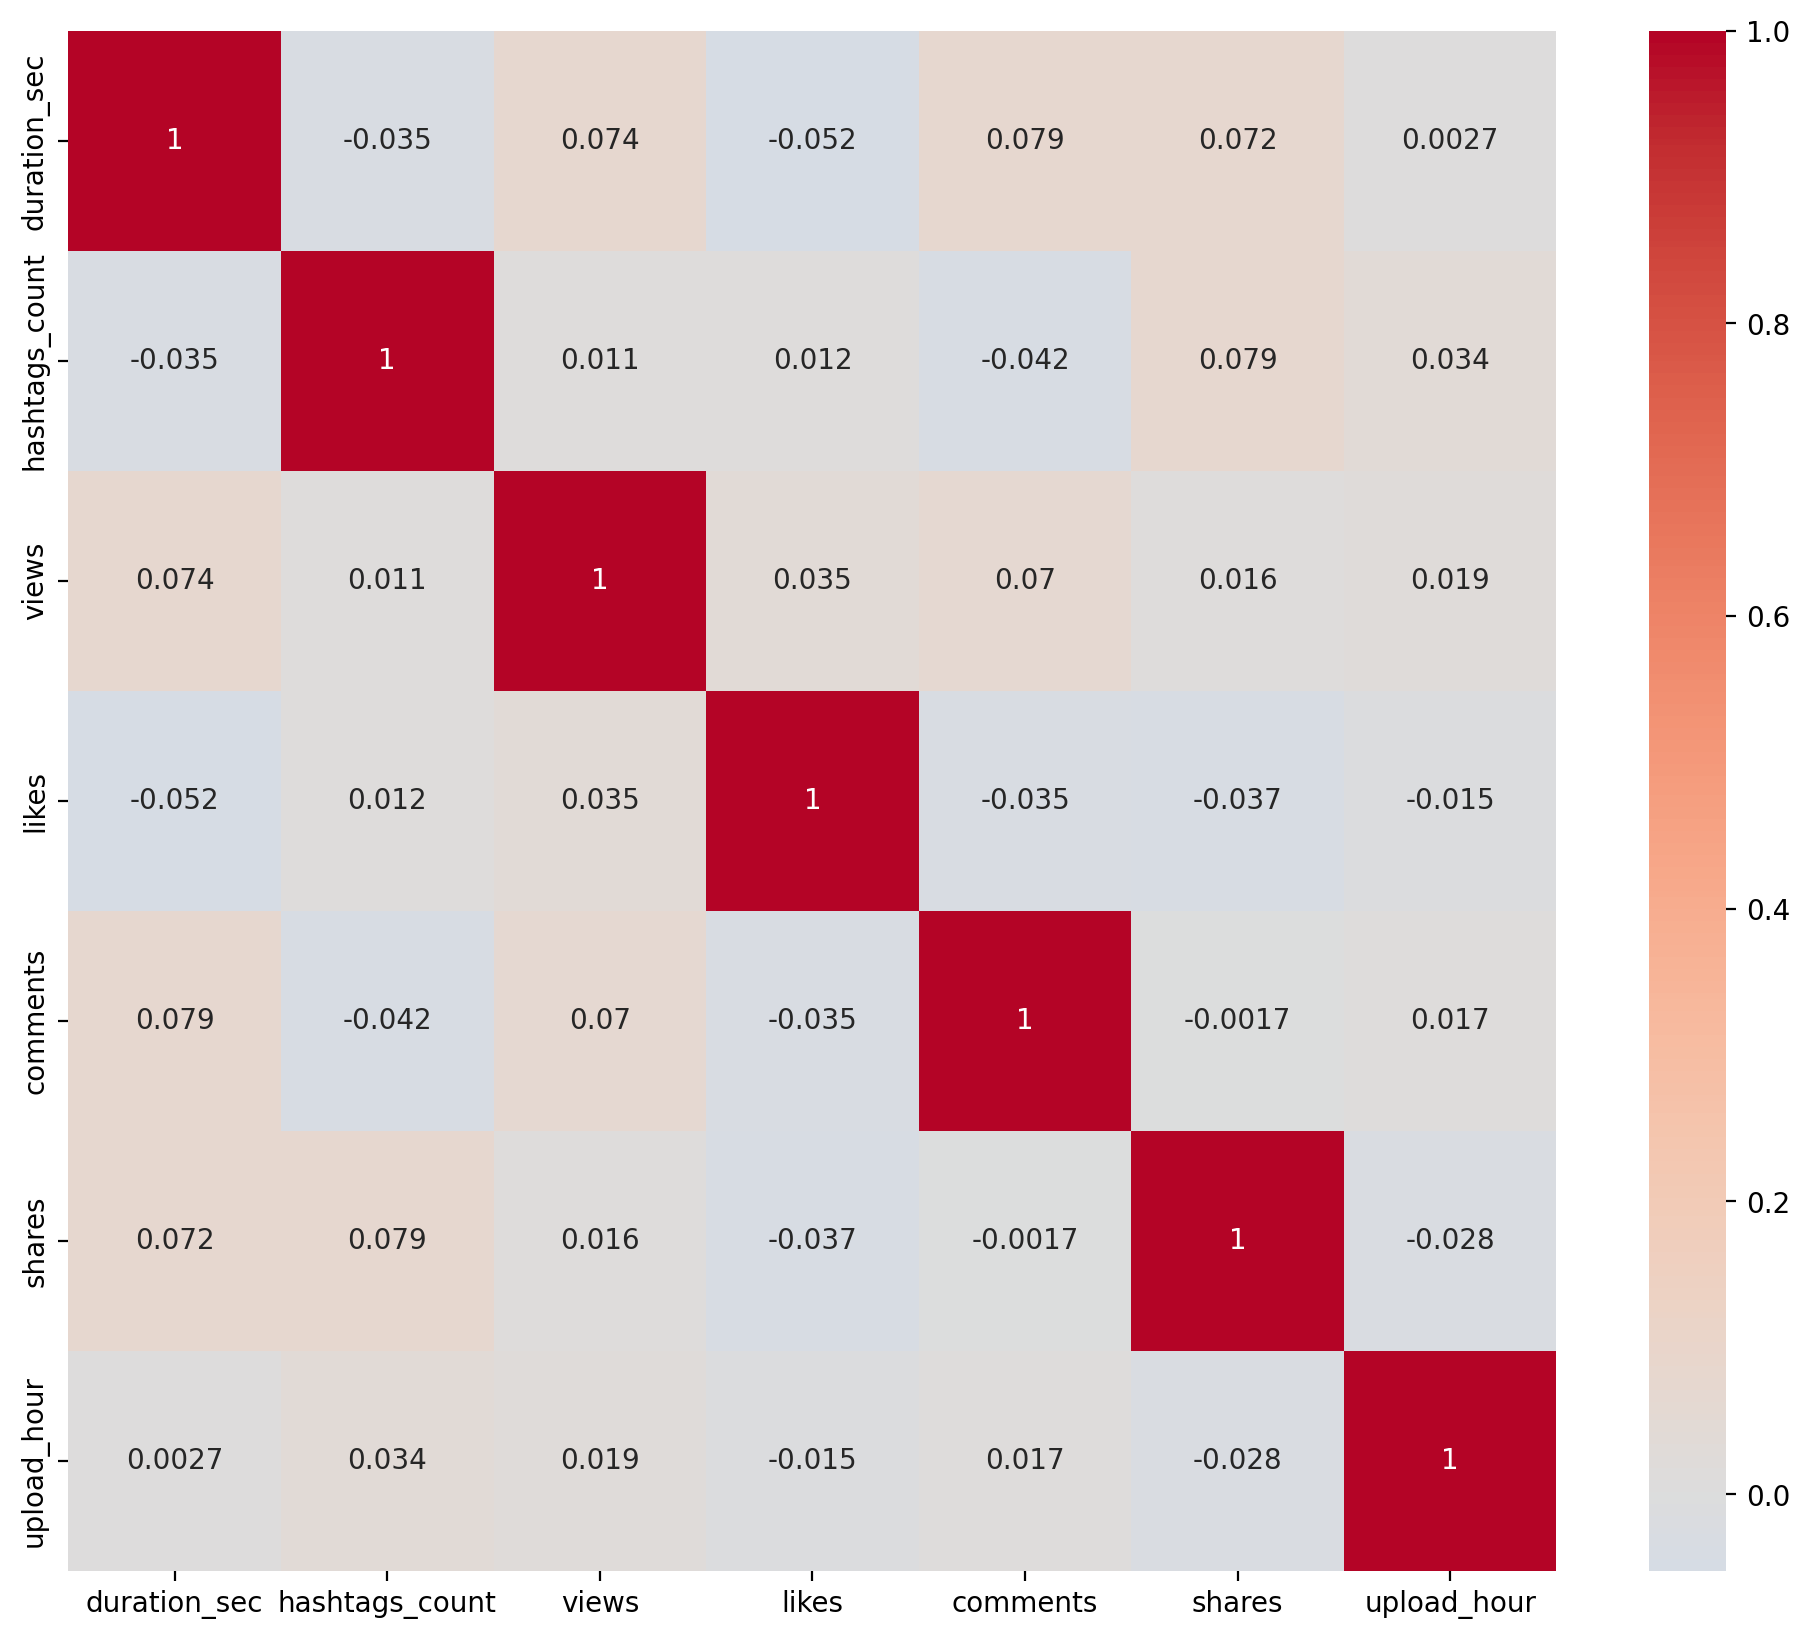

In [7]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

In [ ]:
import pandas as pd
dataset_name = "marketing-and-e-commerce-analytics-dataset"
campaigns = pd.read_csv(f"../data/raw/{dataset_name}/campaigns.csv")
customers = pd.read_csv(f"../data/raw/{dataset_name}/customers.csv")
events = pd.read_csv(f"../data/raw/{dataset_name}/events.csv")
products = pd.read_csv(f"../data/raw/{dataset_name}/products.csv")
transactions = pd.read_csv(f"../data/raw/{dataset_name}/transactions.csv")



display(campaigns.head())
display(customers.head())
display(events.head())
display(products.head())
display(transactions.head())



,campaign_id,channel,objective,start_date,end_date,target_segment,expected_uplift
0,1,Paid Search,Cross-sell,2021-10-25,2021-11-26,Deal Seekers,0.022
1,2,Email,Retention,2021-10-24,2021-12-24,Deal Seekers,0.116
2,3,Email,Reactivation,2023-10-08,2023-11-30,Churn Risk,0.100
3,4,Display,Reactivation,2022-07-25,2022-10-07,Deal Seekers,0.111
4,5,Social,Acquisition,2022-07-09,2022-09-29,New Customers,0.144


,customer_id,signup_date,country,age,gender,loyalty_tier,acquisition_channel
0,1,2021-04-08,BR,48,Male,Bronze,Referral
1,2,2023-04-28,IN,36,Female,Silver,Organic
2,3,2022-12-18,UK,35,Female,Silver,Organic
3,4,2022-04-26,US,45,Male,Silver,Paid Search
4,5,2022-04-20,IN,53,Male,Silver,Organic


,event_id,timestamp,customer_id,session_id,event_type,product_id,device_type,traffic_source,campaign_id,page_category,session_duration_sec,experiment_group
0,1,2021-01-14 13:35:43,43812,535101,view,1004.0,desktop,Email,43,PLP,115.1,Control
1,2,2021-12-03 21:36:50,71340,96426,add_to_cart,986.0,desktop,Email,10,PDP,32.4,Variant_A
2,3,2021-12-27 08:25:15,59540,220126,purchase,1630.0,mobile,Organic,0,PDP,190.7,Variant_A
3,4,2022-01-22 15:06:54,3601,484555,add_to_cart,1532.0,desktop,Paid Search,30,Checkout,134.8,Variant_B
4,5,2021-05-10 12:03:09,92735,60646,bounce,NaN,desktop,Email,26,PLP,53.1,Variant_A


,product_id,category,brand,base_price,launch_date,is_premium
0,1,Grocery,Brand_58,14.19,2021-08-02,0
1,2,Fashion,Brand_1,25.80,2021-09-14,0
2,3,Electronics,Brand_70,165.46,2021-01-18,1
3,4,Fashion,Brand_56,75.45,2023-03-03,1
4,5,Sports,Brand_1,72.50,2022-04-19,1


,transaction_id,timestamp,customer_id,product_id,quantity,discount_applied,gross_revenue,campaign_id,refund_flag
0,1,2021-12-27 08:25:15,59540,1630.0,3,0.00,43.74,0,0
1,2,2023-06-06 21:14:26,54871,1901.0,3,0.00,174.78,21,0
2,3,2023-08-31 05:29:54,51818,1884.0,1,0.00,40.61,37,0
3,4,2022-06-26 20:33:46,18164,1114.0,2,0.15,68.76,13,0
4,5,2023-07-26 18:12:35,86915,408.0,1,0.00,14.64,4,0
